In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-salaries/Salaries.csv
/kaggle/input/sf-salaries/database.sqlite


In [2]:
import pandas as pd
import pandas as np
import sqlite3
import matplotlib.pyplot as plt

In [3]:

database = "/kaggle/input/sf-salaries/database.sqlite"

In [4]:
conn = sqlite3.connect(database)

In [5]:
tables = pd.read_sql("""select * from Sqlite_master
where type = 'table'
""",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


In [6]:
Salaries = pd.read_sql("""select * from Salaries""",conn)
Salaries

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [7]:
high_paying_employees = pd.read_sql('''select EmployeeName, JobTitle, BasePay
                                        from Salaries
                                        where BasePay > 250000
                                        limit 10''',conn)
high_paying_employees

,EmployeeName,JobTitle,BasePay
0,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96
1,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00
2,EDWARD HARRINGTON,EXECUTIVE CONTRACT EMPLOYEE,294580.02
3,JOHN MARTIN,DEPARTMENT HEAD V,271329.03
4,AMY HART,DEPARTMENT HEAD V,268604.57
5,ELLEN MOFFATT,ASSISTANT MEDICAL EXAMINER,257510.59
6,VENUS AZAR,ASSISTANT MEDICAL EXAMINER,257510.48
7,JUDY MELINEK,ASSISTANT MEDICAL EXAMINER,257510.44
8,GREGORY SUHR,CHIEF OF POLICE,256470.41
9,DENISE SCHMITT,DEPUTY CHIEF III (POLICE DEPARTMENT),261717.60


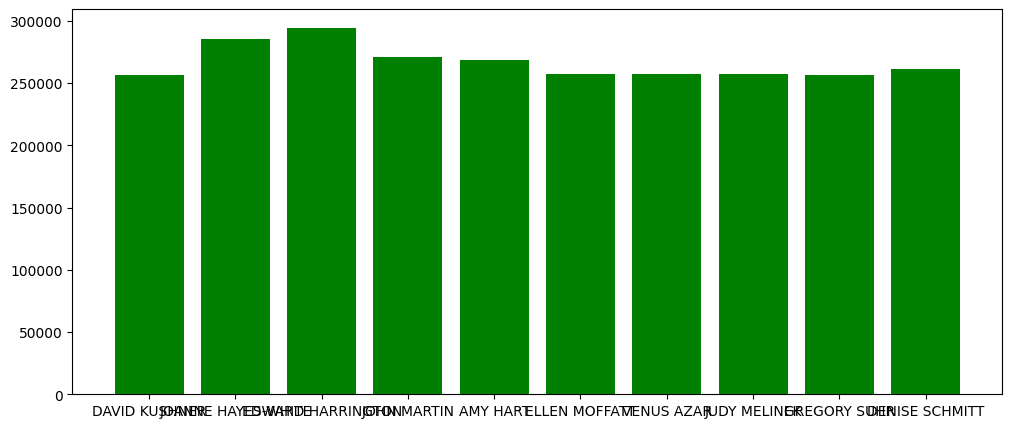

In [8]:
plt.figure(figsize=(12,5))
y = high_paying_employees["BasePay"]

x = high_paying_employees['EmployeeName']
plt.bar(x,y,align='center',color='g')

plt.show()

In [9]:
medium_paying_employees = pd.read_sql('''select EmployeeName, JobTitle, BasePay
                                            from Salaries
                                            where BasePay between 150000 and 250000
                                            limit 10 ''',conn)
medium_paying_employees

,EmployeeName,JobTitle,BasePay
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13
3,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64
4,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39
5,DAVID FRANKLIN,"BATTALION CHIEF, (FIRE DEPARTMENT)",174872.64
6,RICHARD CORRIEA,"COMMANDER III, (POLICE DEPARTMENT)",198778.01
7,MARTY ROSS,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.63
8,VICTOR WYRSCH,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.63
9,RAYMOND GUZMAN,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.59


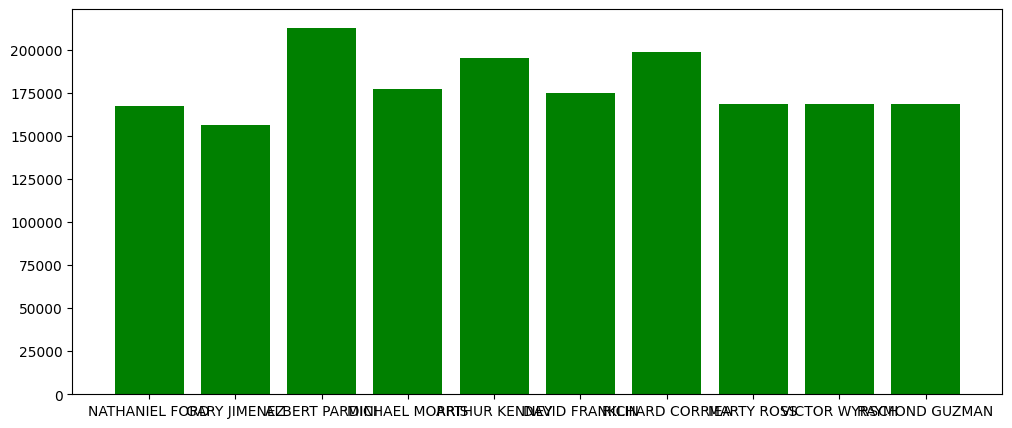

In [10]:
plt.figure(figsize=(12,5))
y = medium_paying_employees["BasePay"]

x = medium_paying_employees['EmployeeName']
plt.bar(x,y,align='center',color='g')

plt.show()

In [11]:
normal_paying_employees = pd.read_sql('''select EmployeeName, JobTitle, BasePay
                                            from Salaries
                                            where BasePay < 150000
                                            limit 10 ''',conn)
normal_paying_employees

,EmployeeName,JobTitle,BasePay
0,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00
1,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60
2,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00
3,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01
4,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00
5,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.87
6,GEORGE GARCIA,"CAPTAIN, FIRE SUPPRESSION",140546.88
7,JOSEPH DRISCOLL,"CAPTAIN, FIRE SUPPRESSION",140546.86
8,JOHN HANLEY,"CAPTAIN, FIRE SUPPRESSION",92080.80
9,JOHN TURSI,"INSPECTOR III, (POLICE DEPARTMENT)",104861.39


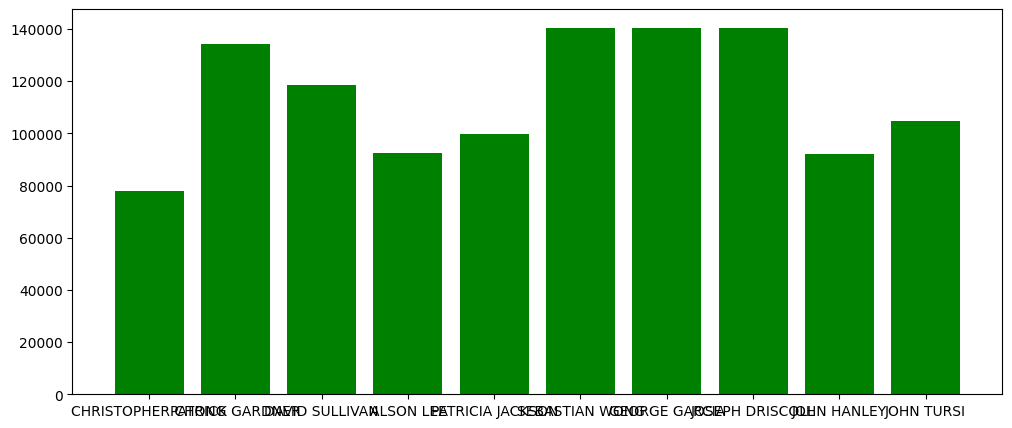

In [12]:
plt.figure(figsize=(12,5))
y = normal_paying_employees["BasePay"]

x = normal_paying_employees['EmployeeName']
plt.bar(x,y,align='center',color='g')

plt.show()

In [13]:
employees_2011 = pd.read_sql('''select EmployeeName, TotalPay, Year
                                    from Salaries
                                    where Year = 2011
                                    order by TotalPay desc
                                    limit 10''',conn)
employees_2011

,EmployeeName,TotalPay,Year
0,NATHANIEL FORD,567595.43,2011
1,GARY JIMENEZ,538909.28,2011
2,ALBERT PARDINI,335279.91,2011
3,CHRISTOPHER CHONG,332343.61,2011
4,PATRICK GARDNER,326373.19,2011
5,DAVID SULLIVAN,316285.74,2011
6,ALSON LEE,315981.05,2011
7,DAVID KUSHNER,307899.46,2011
8,MICHAEL MORRIS,303427.55,2011
9,JOANNE HAYES-WHITE,302377.73,2011


In [14]:
employees_2014 = pd.read_sql('''select EmployeeName, TotalPay, Year
                                    from Salaries
                                    where Year = 2014
                                    order by TotalPay desc
                                    limit 10''',conn)
employees_2014

,EmployeeName,TotalPay,Year
0,David Shinn,471952.64,2014
1,Amy P Hart,390111.98,2014
2,Ellen G Moffatt,344187.46,2014
3,William J Coaker Jr.,339653.70,2014
4,Samson Lai,335484.96,2014
5,David L Franklin,329390.54,2014
6,Gregory P Suhr,326716.76,2014
7,Joanne M Hayes-White,326233.44,2014
8,Richard L Corriea,322143.10,2014
9,Yifang Qian,311650.36,2014


In [15]:
employees_2011_2014 = pd.read_sql('''select EmployeeName, TotalPay, Year
                                        from Salaries
                                        where Year between 2011 and 2014
                                        order by TotalPay desc
                                        limit 10 ''',conn)
employees_2011_2014

,EmployeeName,TotalPay,Year
0,NATHANIEL FORD,567595.43,2011
1,GARY JIMENEZ,538909.28,2011
2,David Shinn,471952.64,2014
3,Amy P Hart,390111.98,2014
4,Gary Altenberg,362844.66,2012
5,John Goldberg,350403.41,2012
6,Samson Lai,347102.32,2013
7,Ellen G Moffatt,344187.46,2014
8,William J Coaker Jr.,339653.70,2014
9,Gregory P Suhr,339282.07,2013


In [16]:
a_employees = pd.read_sql('''select EmployeeName, JobTitle, TotalPay
                                from Salaries
                                where EmployeeName like 'A%'
                                order by TotalPay desc
                                limit 10''',conn)
a_employees

,EmployeeName,JobTitle,TotalPay
0,Amy P Hart,Asst Med Examiner,390111.98
1,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),335279.91
2,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",315981.05
3,Amy P Hart,Dept Head V,303669.15
4,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",299494.17
5,Arthur W Kenney,Asst Chf of Dept (Fire Dept),298710.31
6,Amy Hart,Dept Head V,291389.77
7,Arthur W Kenney,Asst Chf of Dept (Fire Dept),289247.63
8,Antonio B Santiago,Deputy Sheriff,287479.58
9,AMY HART,DEPARTMENT HEAD V,284720.43


In [17]:
job_title_employees = pd.read_sql('''select EmployeeName, JobTitle, TotalPay
                                        from Salaries
                                        where JobTitle like 'ASSISTANT%'
                                        order by TotalPay desc
                                        limit 10 ''',conn)
job_title_employees

,EmployeeName,JobTitle,TotalPay
0,Mark Kearney,Assistant Deputy Chief 2,327689.78
1,Michael J Morris,Assistant Deputy Chief 2,326376.37
2,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,316285.74
3,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",299494.17
4,Michael Morris,Assistant Deputy Chief 2,294212.55
5,Thomas Harvey,Assistant Deputy Chief 2,281442.58
6,ELLEN MOFFATT,ASSISTANT MEDICAL EXAMINER,274550.25
7,VENUS AZAR,ASSISTANT MEDICAL EXAMINER,274190.27
8,JUDY MELINEK,ASSISTANT MEDICAL EXAMINER,273771.21
9,Thomas E Harvey,Assistant Deputy Chief 2,265122.52


In [18]:
total_pay_end_10 = pd.read_sql('''select EmployeeName, JobTitle, TotalPay
                                    from Salaries
                                    where TotalPay like '%10'
                                    limit 10 ''',conn)
total_pay_end_10

,EmployeeName,JobTitle,TotalPay
0,LUCRETIA BOLIN,NURSE PRACTITIONER,158310
1,ANDY WONG,ELECTRONIC MAINTENANCE TECHNICIAN,123010
2,RICHARD KING,CONSTRUCTION INSPECTOR,95110
3,CATHRINE SNEED,REHABILITATION SERVICES COORDINATOR,78610
4,WILLIAM HUGGINS,STATIONARY ENGINEER,72410
5,WILLIAM FEIN JR,EXECUTIVE SECRETARY II,71410
6,ROSALIE PAYN MOHLER,MENTAL HEALTH REHABILITATION WORKER,59410
7,AMY ENDO,LEGAL RESEARCH ASSISTANT,48510
8,ANNICK PERSINGER,LEGAL RESEARCH ASSISTANT,48510
9,NEVEO MOSSER,"BOARD/COMMISSION MEMBER, GROUP III",210


In [19]:
total_pay_start_7_end_10 = pd.read_sql('''select EmployeeName, JobTitle, TotalPay
                                            from Salaries
                                            where TotalPay like '7%10'
                                            limit 10 ''',conn)
total_pay_start_7_end_10

,EmployeeName,JobTitle,TotalPay
0,CATHRINE SNEED,REHABILITATION SERVICES COORDINATOR,78610
1,WILLIAM HUGGINS,STATIONARY ENGINEER,72410
2,WILLIAM FEIN JR,EXECUTIVE SECRETARY II,71410
3,Elaine Wong,Program Specialist,77810
4,Michelle Berry,Program Specialist,77810
5,Mari Solis,Program Specialist,77810
6,Lesley Head,Health Program Coordinator 3,74710
7,Lauren A Machado,Administrative Analyst,74010
8,Yolanda S Arenas,Senior Collections Officer,73710
9,Antonio Padilla,Traffic Survey Technician,70410


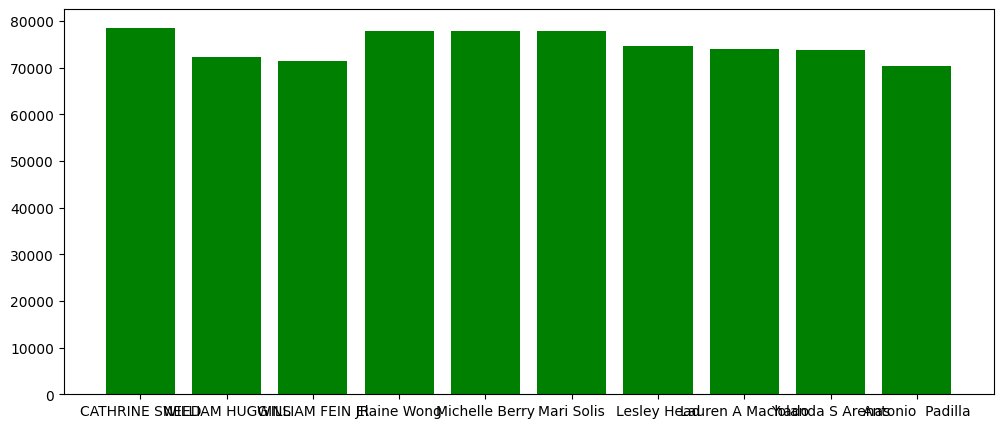

In [20]:

plt.figure(figsize=(12,5))
y = total_pay_start_7_end_10["TotalPay"]

x = total_pay_start_7_end_10['EmployeeName']
plt.bar(x,y,align='center',color='g')

plt.show()